# Credit EDA Case Study

In [271]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [272]:
# Import the relevant packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [273]:
# Setting option to view all columns 

pd.set_option('display.max_columns', 150)   # to increase to see 150 columns on screen

# 1. Importing the given Application data

## Starting with the Application Data

In [274]:
# Read the application data

app_df = pd.read_csv("application_data.csv")

## 1.1 Inspecting the data frame

In [275]:
app_df.shape                 # Shape of the dataframe with the current application data

(307511, 122)

In [276]:
app_df.info()                # Information about the columns / variables of current application data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [277]:
app_df.describe()            # inspecting the numerical columns / variables

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 1.2 Checking NULL values

#### Checking the NULL values in variables and their percentages

In [278]:
(app_df.isnull().sum(axis=0))

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [279]:
round(((app_df.isnull().sum(axis=0))*100)/(len(app_df.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

#### Since it is not practical to check the large number of variables in current application data, we can split dataframe and inspect

In [280]:
app_df1 = app_df.iloc[:, :43]
round(((app_df1.isnull().sum(axis=0))*100)/(len(app_df1.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [281]:
app_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [282]:
app_df2 = app_df.iloc[:, 43:86]
round(((app_df2.isnull().sum(axis=0))*100)/(len(app_df2.index)),2)

EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTMENTS_MODE           68.35
LIVINGAREA_M

In [283]:
app_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
EXT_SOURCE_3                    246546 non-null float64
APARTMENTS_AVG                  151450 non-null float64
BASEMENTAREA_AVG                127568 non-null float64
YEARS_BEGINEXPLUATATION_AVG     157504 non-null float64
YEARS_BUILD_AVG                 103023 non-null float64
COMMONAREA_AVG                  92646 non-null float64
ELEVATORS_AVG                   143620 non-null float64
ENTRANCES_AVG                   152683 non-null float64
FLOORSMAX_AVG                   154491 non-null float64
FLOORSMIN_AVG                   98869 non-null float64
LANDAREA_AVG                    124921 non-null float64
LIVINGAPARTMENTS_AVG            97312 non-null float64
LIVINGAREA_AVG                  153161 non-null float64
NONLIVINGAPARTMENTS_AVG         93997 non-null float64
NONLIVINGAREA_AVG               137829 non-null float64
APARTMENTS_MODE                 151450 non-null float

In [284]:
app_df3 = app_df.iloc[:, 86:]
round(((app_df3.isnull().sum(axis=0))*100)/(len(app_df3.index)),2)

FONDKAPREMONT_MODE            68.39
HOUSETYPE_MODE                50.18
TOTALAREA_MODE                48.27
WALLSMATERIAL_MODE            50.84
EMERGENCYSTATE_MODE           47.40
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_7                0.00
FLAG_DOCUMENT_8                0.00
FLAG_DOCUMENT_9                0.00
FLAG_DOCUMENT_10               0.00
FLAG_DOCUMENT_11               0.00
FLAG_DOCUMENT_12               0.00
FLAG_DOCUMENT_13               0.00
FLAG_DOCUMENT_14               0.00
FLAG_DOCUMENT_15               0.00
FLAG_DOCUMENT_16               0.00
FLAG_DOCUMENT_17               0.00
FLAG_DOCUMENT_18               0.00
FLAG_DOCUMENT_19            

In [285]:
app_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
FONDKAPREMONT_MODE            97216 non-null object
HOUSETYPE_MODE                153214 non-null object
TOTALAREA_MODE                159080 non-null float64
WALLSMATERIAL_MODE            151170 non-null object
EMERGENCYSTATE_MODE           161756 non-null object
OBS_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
DAYS_LAST_PHONE_CHANGE        307510 non-null float64
FLAG_DOCUMENT_2               307511 non-null int64
FLAG_DOCUMENT_3               307511 non-null int64
FLAG_DOCUMENT_4               307511 non-null int64
FLAG_DOCUMENT_5               307511 non-null int64
FLAG_DOCUMENT_6               307511 non-null int64
FLAG_DOCUMENT_7               307511 non-null int64
FLAG_DOCUMENT_8               307511 non-n

## 1.3 Dropping the Unnecessary Columns

### Dropping the columns with > 50% NULL values

##### We observe that these columns may not be needed for our further analysis anyway

In [286]:
# We observed from app_df1 that these columns have > 50% NULL 

app_df.drop(["OWN_CAR_AGE", "EXT_SOURCE_1"], axis = 1, inplace = True)  



In [287]:
# Getting all column names for app_df2 in a list to help in dropping the columns

col_list = app_df2.columns

In [288]:
col_list

Index(['EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI'],
      dtype='obje

In [289]:
# We observed from app_df2 that these columns have > 50% NULL 

app_df.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI'], axis = 1, inplace = True)

In [290]:
# We observed from app_df3 that these columns have > 50% NULL 

app_df.drop(["FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE"], axis=1, inplace = True)

In [291]:
app_df.shape  # checking the shape after the high NULL value % columns have been dropped  

(307511, 81)

### Inspecting the columns which have lower NULL values % (say < 13%)

In [292]:
# From earlier analysis we see the following columns to fall in this category:

# NAME_TYPE_SUITE
# AMT_GOODS_PRICE
# EXT_SOURCE_2 
# OBS_30_CNT_SOCIAL_CIRCLE
# DEF_30_CNT_SOCIAL_CIRCLE
# OBS_60_CNT_SOCIAL_CIRCLE
# DEF_60_CNT_SOCIAL_CIRCLE
# AMT_REQ_CREDIT_BUREAU_HOUR
# AMT_REQ_CREDIT_BUREAU_DAY
# AMT_REQ_CREDIT_BUREAU_WEEK
# AMT_REQ_CREDIT_BUREAU_MON
# AMT_REQ_CREDIT_BUREAU_QRT
# AMT_REQ_CREDIT_BUREAU_YEAR


#### 1] NAME_TYPE_SUITE

In [293]:
app_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [294]:
round(app_df["NAME_TYPE_SUITE"].value_counts()/ len(app_df["NAME_TYPE_SUITE"])*100,2)

Unaccompanied      80.82
Family             13.06
Spouse, partner     3.70
Children            1.06
Other_B             0.58
Other_A             0.28
Group of people     0.09
Name: NAME_TYPE_SUITE, dtype: float64

In [295]:
app_df["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

In [296]:
# Since >80% records have the value 'Unaccompanied', if we have to impute the NULL values 
# we can replace with 'Unaccompanied'  

#### 2] EXT_SOURCE_2

In [297]:
app_df["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

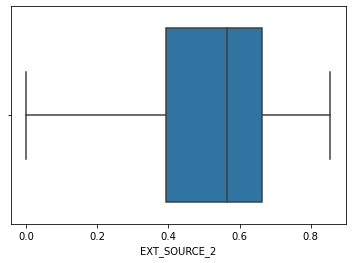

In [298]:
sns.boxplot(app_df["EXT_SOURCE_2"])
plt.show()

In [299]:
# Since there are no outliers we can impute the NULL values with the mean value of the column

#### 3] AMT_GOODS_PRICE

In [300]:
app_df["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

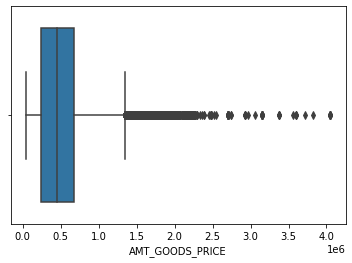

In [301]:
sns.boxplot(app_df["AMT_GOODS_PRICE"])
plt.show()

In [302]:
# The column has many outliers, so to impute the NULL values, we should use the median value 

#### 4] OBS_30_CNT_SOCIAL_CIRCLE

In [303]:
app_df["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

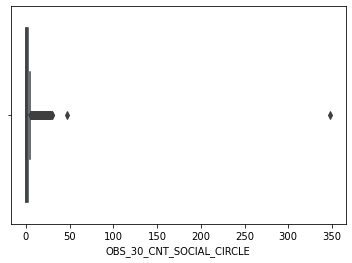

In [304]:
sns.boxplot(app_df["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.show

In [305]:
# The column has outlier values, so to impute the NULL values, we should use the median value

#### 5] DEF_30_CNT_SOCIAL_CIRCLE

In [306]:
app_df["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

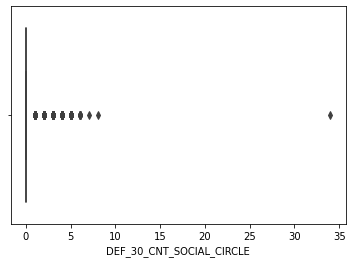

In [307]:
sns.boxplot(app_df["DEF_30_CNT_SOCIAL_CIRCLE"])
plt.show

In [308]:
# Most of the values in the column are 0's, as seen upto 75% (third quartile) and there are a few outliers
# we should impute the values with the median, which will be 0 in this case

### Inspecting the datatype / data for key columns

In [309]:
# We observe that the DAYS_BIRTH column has negative values. Since these indicate the age of the applicant person,
# they should be positive

app_df["DAYS_BIRTH"].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [310]:
# Converting the days into a positive number

app_df["DAYS_BIRTH"] = app_df["DAYS_BIRTH"].abs()

In [311]:
app_df["DAYS_BIRTH"].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [312]:
app_df["DAYS_BIRTH"].head(10)

0     9461
1    16765
2    19046
3    19005
4    19932
5    16941
6    13778
7    18850
8    20099
9    14469
Name: DAYS_BIRTH, dtype: int64

In [313]:
# We see a similar case with the following columns 

In [314]:
app_df["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [315]:
app_df["DAYS_REGISTRATION"].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [316]:
app_df["DAYS_ID_PUBLISH"].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [317]:
app_df["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [318]:
# Changing these variables to positive values

app_df["DAYS_EMPLOYED"] = app_df["DAYS_EMPLOYED"].abs()
app_df["DAYS_REGISTRATION"] = app_df["DAYS_REGISTRATION"].abs()
app_df["DAYS_ID_PUBLISH"] = app_df["DAYS_ID_PUBLISH"].abs()
app_df["DAYS_LAST_PHONE_CHANGE"] = app_df["DAYS_LAST_PHONE_CHANGE"].abs()

In [319]:
# Checking the data after converting to positive values

In [320]:
app_df["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [321]:
app_df["DAYS_REGISTRATION"].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [322]:
app_df["DAYS_ID_PUBLISH"].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [323]:
app_df["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### For the columns having only 0 or 1 flag or just some defined ratings, we should change the data type to "category"

In [324]:
# Changing data type of the "Target" variable  
app_df["TARGET"] = app_df["TARGET"].astype("category")

In [325]:
# Creating list of all the columns/ variables, whose data type has to be changed
col_list2 = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL",
             "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
            "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY",
            "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", 
             "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", 
             "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14","FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16",
            "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]

In [326]:
# Changing the data type of the columns/ variables identified
for col2 in col_list2:
    app_df[col2] = app_df[col2].astype("category")


In [327]:
# Checking if the data type has got changed

app_df[col_list2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
FLAG_MOBIL                     307511 non-null category
FLAG_EMP_PHONE                 307511 non-null category
FLAG_WORK_PHONE                307511 non-null category
FLAG_CONT_MOBILE               307511 non-null category
FLAG_PHONE                     307511 non-null category
FLAG_EMAIL                     307511 non-null category
REGION_RATING_CLIENT           307511 non-null category
REGION_RATING_CLIENT_W_CITY    307511 non-null category
REG_REGION_NOT_LIVE_REGION     307511 non-null category
REG_REGION_NOT_WORK_REGION     307511 non-null category
LIVE_REGION_NOT_WORK_REGION    307511 non-null category
REG_CITY_NOT_LIVE_CITY         307511 non-null category
REG_CITY_NOT_WORK_CITY         307511 non-null category
LIVE_CITY_NOT_WORK_CITY        307511 non-null category
FLAG_DOCUMENT_2                307511 non-null category
FLAG_DOCUMENT_3                307511 non-null ca

## 1.4 Outlier Analysis 

In [328]:
# In the earlier section on analysis of NULL values, we have already checked the plots for following variables and 
                    # reviewed the outliers  

# EXT_SOURCE_2 : We did not observe any outliers as per the plot

# AMT_GOODS_PRICE : We observed outliers beyond value of about 1,250,000, as there could be some expensive goods 
                    # against which the loans were sought

# OBS_30_CNT_SOCIAL_CIRCLE: Most of the values are 0 but, even third quartile has 0's upto 75% ,
                    # there are some outliers with maximum upto 348

# DEF_30_CNT_SOCIAL_CIRCLE: Most of the values are 0 but, even third quartile goes upto the value of 2 upto 75%,
                    #there are some outliers with maximum upto 34

<function matplotlib.pyplot.show(*args, **kw)>

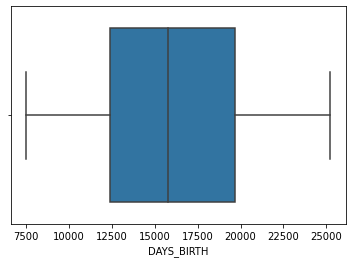

In [329]:
# Checking one more variable for any outliers 

sns.boxplot(app_df["DAYS_BIRTH"])
plt.show

In [330]:
# We do not see any outliers for "DAYS_BIRTH"

## 1.5 Converting continuous variables to bins

In [331]:
# Checking the range of the following numerical variables and creating bins for them

# Approach : look at the range from minimum to maximum values and divide them into three bins

# AMT_ANNUITY

# DAYS_BIRTH

#### 1] AMT_ANNUITY

In [332]:
app_df["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [333]:
# creating bins based on the "Low", "Medium" and "High" Annuity slabs

app_df["ANNUITY_BINS"]= pd.cut(app_df["AMT_ANNUITY"], [1000,90000,180000,270000],labels = ["Low","Medium","High"])

In [334]:
app_df["ANNUITY_BINS"].value_counts()

Low       306583
Medium       876
High          40
Name: ANNUITY_BINS, dtype: int64

#### 2] DAYS_BIRTH

In [335]:
app_df["DAYS_BIRTH"].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [336]:
# creating bins based on the "Young", "Middle" and "Old" Age slabs

app_df["AGE_BINS"]= pd.cut(app_df["DAYS_BIRTH"], [1000,9000,18000,27000],labels = ["Young","Middle","Old"])

In [337]:
app_df["AGE_BINS"].value_counts()

Middle    188483
Old       108277
Young      10751
Name: AGE_BINS, dtype: int64

## 2 Analysis

## 2.1 Imbalance

In [338]:
# Show the imbalance in data
# Below code shows the % of records/ rows with Target = 0 and Target = 1 

print(round(((app_df["TARGET"].value_counts())*100)/len(app_df)),2)

0    92.0
1     8.0
Name: TARGET, dtype: float64 2


In [339]:
# There are about 92% recprds with Target = 0 and rest about 8% with Target = 1 

## 2.2 Dividing the data into two datasets

In [340]:
# Dividing the application dataframe into two data sets

app_df0 = app_df[app_df["TARGET"] == 0]
app_df1 = app_df[app_df["TARGET"] == 1]

In [341]:
app_df0.shape

(282686, 83)

In [342]:
app_df1.shape

(24825, 83)

## 2.3 Univariate Analysis

#### Approach: After picking  a few columns
#### 1] For Categorical variables, plot the bars to check the % of different values in the dataset
#### 2] For Numerical variables, plot the boxplot and inspect the distribution

##### 2.3.1 Categorical variables

#### 1] TARGET

In [343]:
app_df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

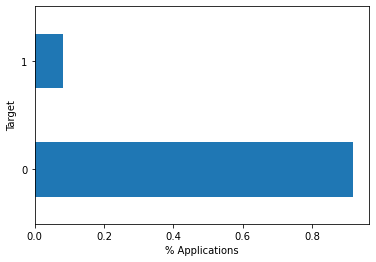

In [344]:
app_df["TARGET"].value_counts(normalize=True).plot.barh()
plt.ylabel("Target")
plt.xlabel("% Applications")
plt.show()

In [345]:
# Observation: About 92% of the clients have been regular payers of their loans

#### 2] NAME_INCOME_TYPE

In [346]:
app_df["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

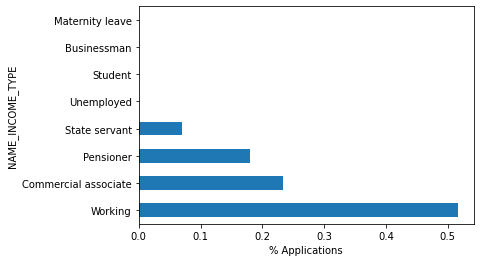

In [347]:
app_df["NAME_INCOME_TYPE"].value_counts(normalize = True).plot.barh()
plt.ylabel("NAME_INCOME_TYPE")
plt.xlabel("% Applications")
plt.show()

In [348]:
# Observation: More than 50% of the applicants have been "Working", followed by about 25% "Commercial Associates" 

#### 3] NAME_CONTRACT_TYPE

In [349]:
app_df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

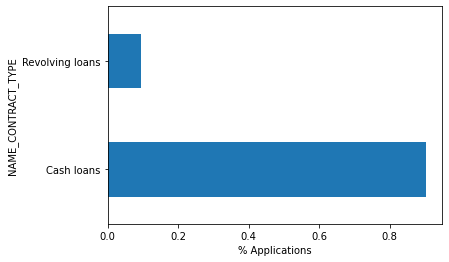

In [350]:
app_df["NAME_CONTRACT_TYPE"].value_counts(normalize = True).plot.barh()
plt.ylabel("NAME_CONTRACT_TYPE")
plt.xlabel("% Applications")
plt.show()

In [351]:
# Observation: About 90% of applications have come for the "Cash Loans"

#### 4] CODE_GENDER

In [352]:
app_df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

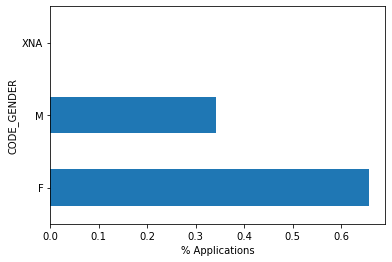

In [353]:
app_df["CODE_GENDER"].value_counts(normalize = True).plot.barh()
plt.ylabel("CODE_GENDER")
plt.xlabel("% Applications")
plt.show()

In [354]:
# Observation: About two-thirds of the applicants are Female gender 

#### 5] NAME_EDUCATION_TYPE

In [355]:
app_df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

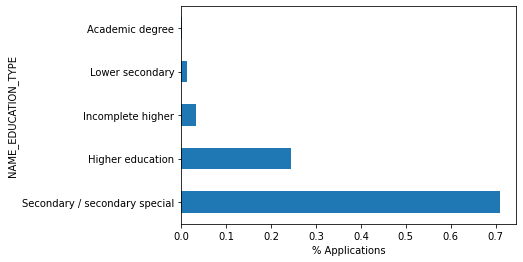

In [356]:
app_df["NAME_EDUCATION_TYPE"].value_counts(normalize = True).plot.barh()
plt.ylabel("NAME_EDUCATION_TYPE")
plt.xlabel("% Applications")
plt.show()

In [357]:
# Observation: About 70% of the applicants have upto" Secondary / Secondary Special" level of education and 
             # about 25% have a "Higher Education" 

##### 2.3.2 Numerical Variables

#### 1] AMT_CREDIT

In [358]:
app_df["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

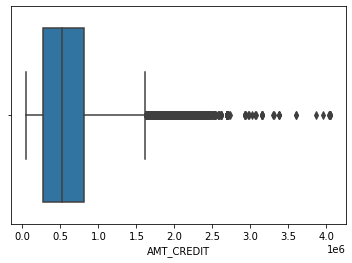

In [359]:
sns.boxplot(app_df["AMT_CREDIT"])
plt.show()

In [360]:
# Observation: 
# The data shows quite a few  outliers.
# Although the median as at 513,531, the maximum value goes upto 4,050,000
# These could be due to the kind of specific loan requirements of the clients

#### 2] AMT_ANNUITY

In [361]:
app_df["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

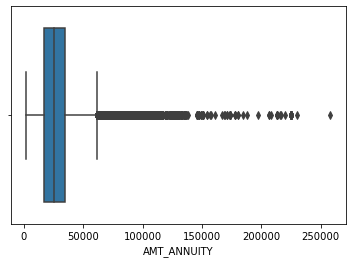

In [362]:
sns.boxplot(app_df["AMT_ANNUITY"])
plt.show()

In [363]:
# Observation: 
# Pattern is very similar to AMT_CREDIT
# The data shows quite a few  outliers. Although the median as at 24,903, the maximum value goes upto 258,025.50

In [364]:
# Plotting the data for variable from the two data sets (Target = 0 and Target = 1) 

#### Univariate analysis of the variables for the two separate dataframes (for Target = 0 and Target = 1) to check any patterns there

#### 1] AMT_ANNUITY

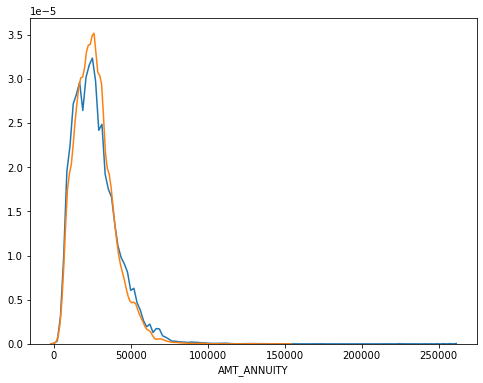

In [365]:
plt.figure(figsize = (8,6))
sns.distplot(app_df0["AMT_ANNUITY"], hist = False ) #Target 0
sns.distplot(app_df1["AMT_ANNUITY"], hist = False ) #Target 1
plt.show()

In [366]:
# Observation:
# For both Target = 0 and Target = 1, the distribution pattern is similar. 
# And both plots peak at around the same Annuity amount 

#### 2] AMT_GOODS_PRICE

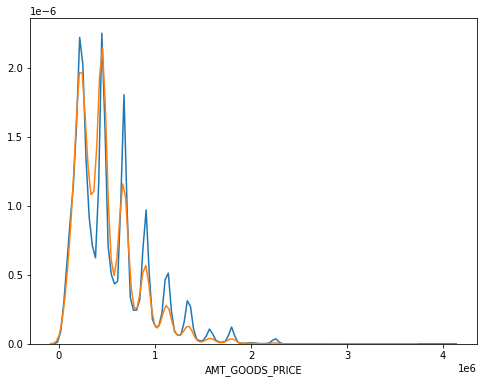

In [367]:
plt.figure(figsize = (8,6))
sns.distplot(app_df0["AMT_GOODS_PRICE"], hist = False ) #Target 0
sns.distplot(app_df1["AMT_GOODS_PRICE"], hist = False ) #Target 1
plt.show()

In [368]:
# Observation:
# For both Target = 0 and Target = 1, the distribution pattern is similar. 
# And both plots have peaks and troughs at around the same Goods Price 

#### 3] DAYS_BIRTH

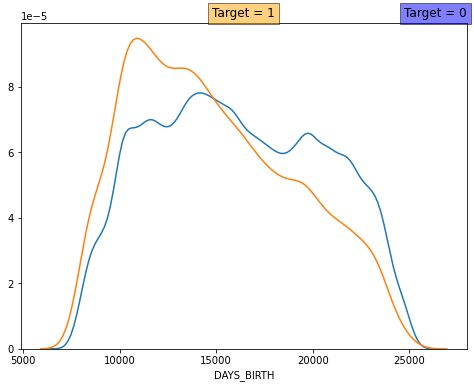

In [369]:
plt.figure(figsize = (8,6))
sns.distplot(app_df0["DAYS_BIRTH"], hist = False ) #Target 0
plt.title("Target = 0", loc = "right", bbox=dict(facecolor='blue', alpha=0.5))
sns.distplot(app_df1["DAYS_BIRTH"], hist = False ) #Target 1
plt.title("Target = 1", loc = "center", bbox=dict(facecolor='orange', alpha=0.5))

plt.show()

In [370]:
# Observation: We see tendency to default in clients of younger age. Clients with older age are more regular payers.

#### 4] DAYS_EMPLOYED

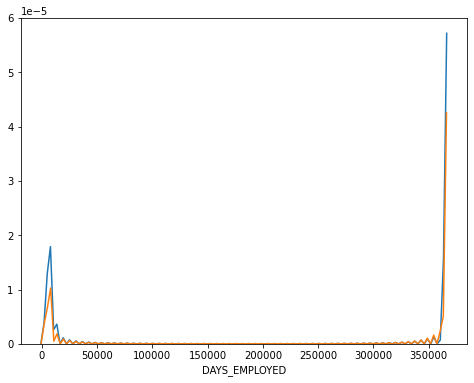

In [371]:
plt.figure(figsize = (8,6))
sns.distplot(app_df0["DAYS_EMPLOYED"], hist = False ) #Target 0
sns.distplot(app_df1["DAYS_EMPLOYED"], hist = False ) #Target 1
plt.show()

In [372]:
# Observation:
# For both Target = 0 and Target = 1, the distribution pattern is similar. 
# And both plots have peaks and troughs at around the same Days Employed

## 2.2 Bivariate / Multivariate Analysis

##### 2.2.1 Categorical Variables

#### Approach:  
#### Look at the cross table for counts between the variable under study and the target variable and also check their %
#### values in each category of cross table. Plot a countplot wherever needed

#### 1] NAME_INCOME_TYPE and TARGET

In [373]:
# Preparing a crosstab to check the values in each category against the Target 
income_target = pd.crosstab(index=app_df["NAME_INCOME_TYPE"],columns=app_df["TARGET"])

In [374]:
income_target

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,10,0
Commercial associate,66257,5360
Maternity leave,3,2
Pensioner,52380,2982
State servant,20454,1249
Student,18,0
Unemployed,14,8
Working,143550,15224


In [375]:
# Checking the % values against the Target variable 

round(income_target.div(income_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,100.0,0.0
Commercial associate,92.5,7.5
Maternity leave,60.0,40.0
Pensioner,94.6,5.4
State servant,94.2,5.8
Student,100.0,0.0
Unemployed,63.6,36.4
Working,90.4,9.6


In [376]:
# 40% late payments in Maternity Leave cases
# 36.4% of unemployed are late payers
# 9.6% defaults in Working, 7.5% in Commercial Associate, 5.4% in pensioners 
# No risks seen for Business and Students

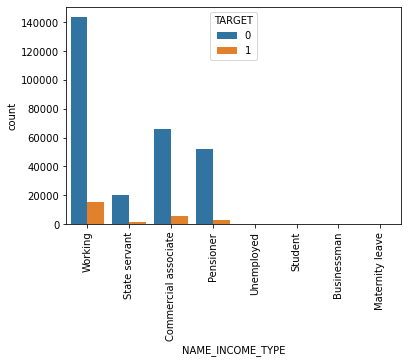

In [377]:
# Countplot
sns.countplot (x = "NAME_INCOME_TYPE", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [378]:
# Since, observed an interesting case of "Unemployed" applying for and getting loans; carried out a specific analysis 

In [379]:
Unemployed_df = app_df[app_df["NAME_INCOME_TYPE"] == "Unemployed"]

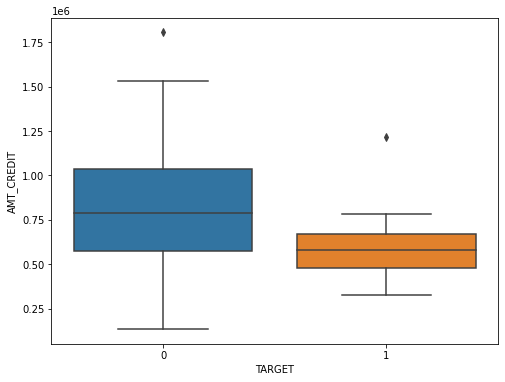

In [380]:
plt.figure(figsize = (8,6))
sns.boxplot(x=Unemployed_df["TARGET"], y=Unemployed_df["AMT_CREDIT"])
#plt.yscale("log")
plt.show()

In [381]:
# Observation: For Unemployed, the defaulting happens in range of 5 to 7.5 lakhs Credit amount

#### 2] NAME_HOUSING_TYPE and TARGET

In [382]:
# Preparing a crosstab to check the values in each category against the Target 
target_housing = pd.crosstab(index=app_df["NAME_HOUSING_TYPE"],columns=app_df["TARGET"])
target_housing

TARGET,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,1033,89
House / apartment,251596,21272
Municipal apartment,10228,955
Office apartment,2445,172
Rented apartment,4280,601
With parents,13104,1736


In [383]:
# Checking the % values against the Target variable 

round(target_housing.div(target_housing.sum(axis=1), axis=0)*100,1)

TARGET,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,92.1,7.9
House / apartment,92.2,7.8
Municipal apartment,91.5,8.5
Office apartment,93.4,6.6
Rented apartment,87.7,12.3
With parents,88.3,11.7


In [384]:
# Observation:
# Applicants with Rented Apartments 12.3% defaults and 11.7% defaults with applicants living with parents

# 8.5% defaulters are in "Municipal" Housing, 7.9% in "Co-op Apartment" and 7.8% with "House/ apartment" 

# Least risky - Office apartments 6.6%

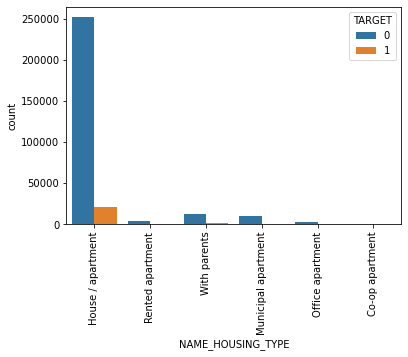

In [385]:
# Also plotting the table to have a visual representation

sns.countplot (x = "NAME_HOUSING_TYPE", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

#### 3] REGION_RATING_CLIENT and TARGET

In [386]:
# Preparing a crosstab to check the values in each category against the Target 
rating1_target = pd.crosstab(index=app_df["REGION_RATING_CLIENT"],columns=app_df["TARGET"])
rating1_target


TARGET,0,1
REGION_RATING_CLIENT,,
1,30645,1552
2,209077,17907
3,42964,5366


In [387]:
# Checking the % values against the Target variable 
round(rating1_target.div(rating1_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
REGION_RATING_CLIENT,,
1,95.2,4.8
2,92.1,7.9
3,88.9,11.1


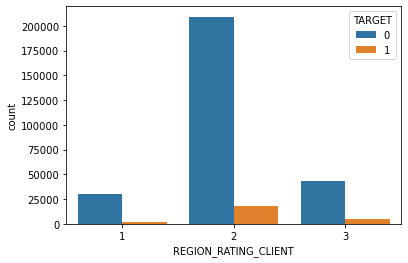

In [388]:
sns.countplot (x = "REGION_RATING_CLIENT", hue= "TARGET", data = app_df)
plt.show()

In [389]:
# Observation:
# For Rating 1, default % is lower at 4.8%; for rating 3 the defaulters are higher at 11.1%

#### 4] REGION_RATING_CLIENT_W_CITY and TARGET

In [390]:
# Preparing a crosstab to check the values in each category against the Target 
rating2_target = pd.crosstab(index=app_df["REGION_RATING_CLIENT_W_CITY"],columns=app_df["TARGET"])
rating2_target

TARGET,0,1
REGION_RATING_CLIENT_W_CITY,,
1,32513,1654
2,211314,18170
3,38859,5001


In [391]:
# Checking the % values against the Target variable 
round(rating2_target.div(rating2_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
REGION_RATING_CLIENT_W_CITY,,
1,95.2,4.8
2,92.1,7.9
3,88.6,11.4


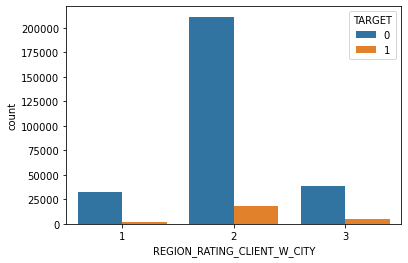

In [392]:
sns.countplot (x = "REGION_RATING_CLIENT_W_CITY", hue= "TARGET", data = app_df)
plt.show()

In [393]:
# Observation:
# For Rating 1, default % is lower at 4.8%; for rating 3 the defaulters are higher at 11.4%

#### 5] REG_REGION_NOT_LIVE_REGION and TARGET

In [394]:
# Preparing a crosstab to check the values in each category against the Target 
notlive_target = pd.crosstab(index=app_df["REG_REGION_NOT_LIVE_REGION"],columns=app_df["TARGET"])
notlive_target

TARGET,0,1
REG_REGION_NOT_LIVE_REGION,,
0,278462,24392
1,4224,433


In [395]:
# Checking the % values against the Target variable 
round(notlive_target.div(notlive_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
REG_REGION_NOT_LIVE_REGION,,
0,91.9,8.1
1,90.7,9.3


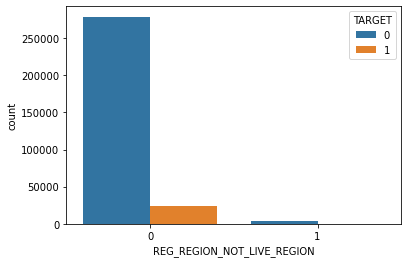

In [396]:
sns.countplot (x = "REG_REGION_NOT_LIVE_REGION", hue= "TARGET", data = app_df)
plt.show()

In [397]:
# Since the difference of % is smaller, and numbers for REG_REGION_NOT_LIVE_REGION = 1 are a small fraction,
 # so, cannot highlight any specific pattern

#### 6] REG_REGION_NOT_WORK_REGION and TARGET

In [398]:
# Preparing a crosstab to check the values in each category against the Target 
notwork_target = pd.crosstab(index=app_df["REG_REGION_NOT_WORK_REGION"],columns=app_df["TARGET"])
notwork_target

TARGET,0,1
REG_REGION_NOT_WORK_REGION,,
0,268462,23437
1,14224,1388


In [399]:
# Checking the % values against the Target variable 
round(notwork_target.div(notwork_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
REG_REGION_NOT_WORK_REGION,,
0,92.0,8.0
1,91.1,8.9


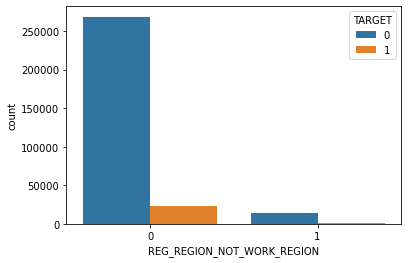

In [400]:
sns.countplot (x = "REG_REGION_NOT_WORK_REGION", hue= "TARGET", data = app_df)
plt.show()

In [401]:
# Since the difference of % is smaller, cannot highlight any specific pattern

#### 7] REG_CITY_NOT_LIVE_CITY and TARGET

In [402]:
# Preparing a crosstab to check the values in each category against the Target 
notperm_target = pd.crosstab(index=app_df["REG_CITY_NOT_LIVE_CITY"],columns=app_df["TARGET"])
notperm_target

TARGET,0,1
REG_CITY_NOT_LIVE_CITY,,
0,261586,21886
1,21100,2939


In [403]:
# Checking the % values against the Target variable 
round(notperm_target.div(notperm_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
REG_CITY_NOT_LIVE_CITY,,
0,92.3,7.7
1,87.8,12.2


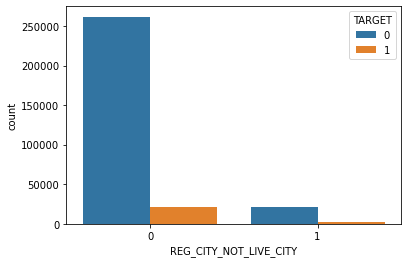

In [404]:
sns.countplot (x = "REG_CITY_NOT_LIVE_CITY", hue= "TARGET", data = app_df)
plt.show()

In [405]:
# Observation: 
# If permanent address does ot match contact address at city level, the probability of defaulting is 
# higher at 12.2% compared to 7.7% when the addresses match 

#### 8] OCCUPATION_TYPE and TARGET

In [406]:
# Preparing a crosstab to check the values in each category against the Target 
occup_target = pd.crosstab(index=app_df["OCCUPATION_TYPE"],columns=app_df["TARGET"])
occup_target

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,9339,474
Cleaning staff,4206,447
Cooking staff,5325,621
Core staff,25832,1738
Drivers,16496,2107
HR staff,527,36
High skill tech staff,10679,701
IT staff,492,34
Laborers,49348,5838


In [407]:
# Checking the % values against the Target variable 
round(occup_target.div(occup_target.sum(axis=1), axis=0)*100,1).sort_values(by = 1, ascending = False)

TARGET,0,1
OCCUPATION_TYPE,,
Low-skill Laborers,82.8,17.2
Drivers,88.7,11.3
Waiters/barmen staff,88.7,11.3
Security staff,89.3,10.7
Laborers,89.4,10.6
Cooking staff,89.6,10.4
Cleaning staff,90.4,9.6
Sales staff,90.4,9.6
Realty agents,92.1,7.9


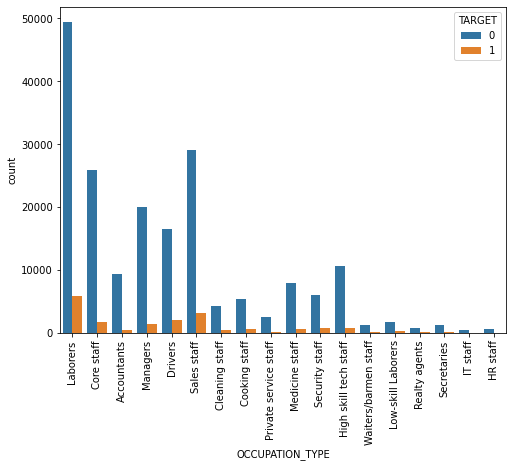

In [408]:
plt.figure(figsize = (8,6))
sns.countplot (x = "OCCUPATION_TYPE", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [409]:
# Observation: 
# Accountants have low defaulting rate at 4.8%, followed by High skill tech staff and managers at 6.2%
# Low-skill Laborers at 17.2%, drivers at 11.3% and Waiter and barmen staff at 11.3% are higher defaulters

#### 9] ORGANIZATION_TYPE and TARGET

In [410]:
# Preparing a crosstab to check the values in each category against the Target 
org_target = pd.crosstab(index=app_df["ORGANIZATION_TYPE"],columns=app_df["TARGET"])
org_target


TARGET,0,1
ORGANIZATION_TYPE,,
Advertising,394,35
Agriculture,2197,257
Bank,2377,130
Business Entity Type 1,5497,487
Business Entity Type 2,9653,900
Business Entity Type 3,61669,6323
Cleaning,231,29
Construction,5936,785
Culture,358,21


In [411]:
# Checking the % values against the Target variable 
round(org_target.div(org_target.sum(axis=1), axis=0)*100,1).sort_values(by = 1, ascending = False)

TARGET,0,1
ORGANIZATION_TYPE,,
Transport: type 3,84.2,15.8
Industry: type 13,86.6,13.4
Industry: type 8,87.5,12.5
Construction,88.3,11.7
Restaurant,88.3,11.7
Cleaning,88.8,11.2
Industry: type 1,88.9,11.1
Industry: type 3,89.4,10.6
Realtor,89.4,10.6


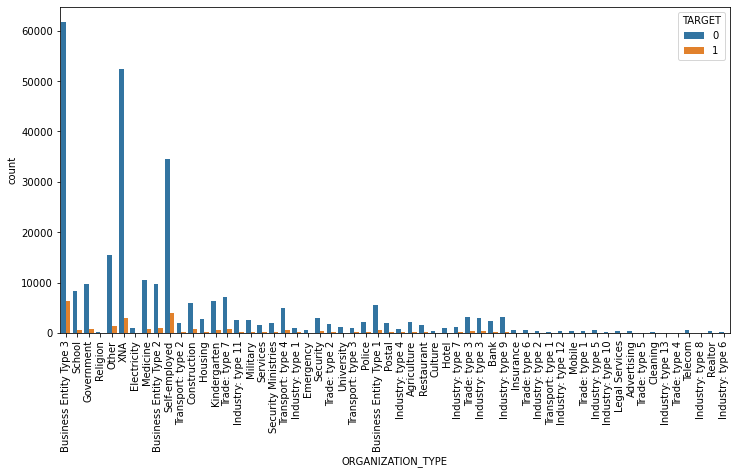

In [412]:
plt.figure(figsize = (12,6))
sns.countplot (x = "ORGANIZATION_TYPE", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [413]:
# Observation:
# Transport: type 3 are higher defaulters at 15.8%, followed by Industry: type 13 at 13.4%
# Trade: type 4 at 3.1% are low defaulters, followed by Industry: type 12 at 3.8%

#### 10] CNT_FAM_MEMBERS and TARGET

In [414]:
# Preparing a crosstab to check the values in each category against the Target 
family_target = pd.crosstab(index=app_df["CNT_FAM_MEMBERS"],columns=app_df["TARGET"])
family_target


TARGET,0,1
CNT_FAM_MEMBERS,,
1.0,62172,5675
2.0,146348,12009
3.0,47993,4608
4.0,22561,2136
5.0,3151,327
6.0,353,55
7.0,75,6
8.0,14,6
9.0,6,0


In [415]:
# Checking the % values against the Target variable 
round(family_target.div(family_target.sum(axis=1), axis=0)*100,1).sort_values(by = 1, ascending = False)

TARGET,0,1
CNT_FAM_MEMBERS,,
11.0,0.0,100.0
13.0,0.0,100.0
10.0,66.7,33.3
8.0,70.0,30.0
6.0,86.5,13.5
5.0,90.6,9.4
3.0,91.2,8.8
4.0,91.4,8.6
1.0,91.6,8.4


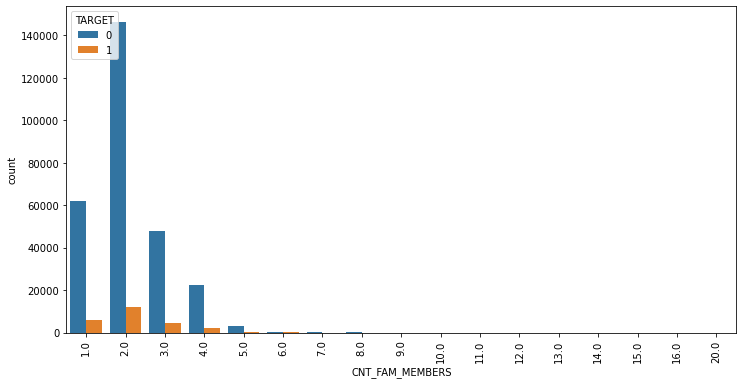

In [416]:
plt.figure(figsize = (12,6))
sns.countplot (x = "CNT_FAM_MEMBERS", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [417]:
# No specific pattern to be highlighted

#### 11] NAME_EDUCATION_TYPE and TARGET

In [418]:
# Preparing a crosstab to check the values in each category against the Target 
edu_target = pd.crosstab(index=app_df["NAME_EDUCATION_TYPE"],columns=app_df["TARGET"])
edu_target

TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,161,3
Higher education,70854,4009
Incomplete higher,9405,872
Lower secondary,3399,417
Secondary / secondary special,198867,19524


In [419]:
# Checking the % values against the Target variable
round(edu_target.div(edu_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,98.2,1.8
Higher education,94.6,5.4
Incomplete higher,91.5,8.5
Lower secondary,89.1,10.9
Secondary / secondary special,91.1,8.9


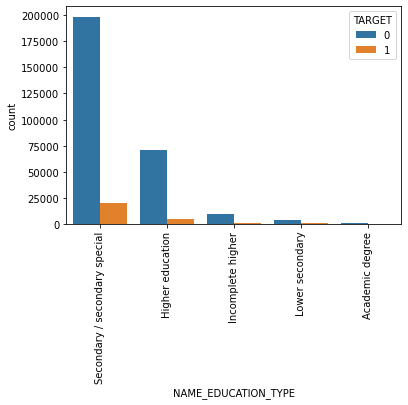

In [420]:
sns.countplot (x = "NAME_EDUCATION_TYPE", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [421]:
# Observation: Lower secondary has higher defaults 1t 10.9%. Academic degree has lower defaults at 1.8%

#### 12] NAME_FAMILY_STATUS and TARGET

In [422]:
# Preparing a crosstab to check the values in each category against the Target 

fam_target = pd.crosstab(index=app_df["NAME_FAMILY_STATUS"],columns=app_df["TARGET"])
fam_target

TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,26814,2961
Married,181582,14850
Separated,18150,1620
Single / not married,40987,4457
Unknown,2,0
Widow,15151,937


In [423]:
# Checking the % values against the Target variable

round(fam_target.div(fam_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,90.1,9.9
Married,92.4,7.6
Separated,91.8,8.2
Single / not married,90.2,9.8
Unknown,100.0,0.0
Widow,94.2,5.8


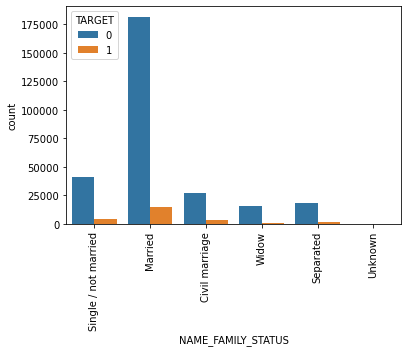

In [424]:
sns.countplot (x = "NAME_FAMILY_STATUS", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [425]:
# Observation: "Civil marriage" and "Single / not married" have higher defaults with 9.9% and 9.8% respectively 

#### 13] CODE_GENDER and TARGET

In [426]:
# Preparing a crosstab to check the values in each category against the Target

gender_target = pd.crosstab(index=app_df["CODE_GENDER"],columns=app_df["TARGET"])
gender_target


TARGET,0,1
CODE_GENDER,,
F,188278,14170
M,94404,10655
XNA,4,0


In [427]:
# Checking the % values against the Target variable

round(gender_target.div(gender_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
CODE_GENDER,,
F,93.0,7.0
M,89.9,10.1
XNA,100.0,0.0


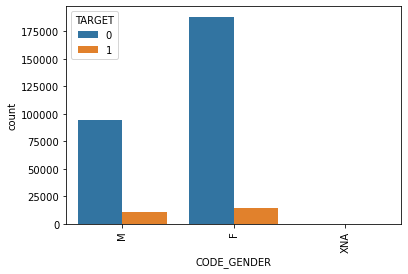

In [428]:
sns.countplot (x = "CODE_GENDER", hue= "TARGET", data = app_df)
plt.xticks(rotation = 90)
plt.show()

In [429]:
# Observation: Male clients have a higher default ratio of 10.1% compared to female clients, who have 7.0%

##### 2.2.2 Numerical variables

#### Approach:
#### Plot the box plots between the numerical variable and Target. Also to check try if there is any correlation  using corr()

#### 1] AMT_INCOME_TOTAL and TARGET

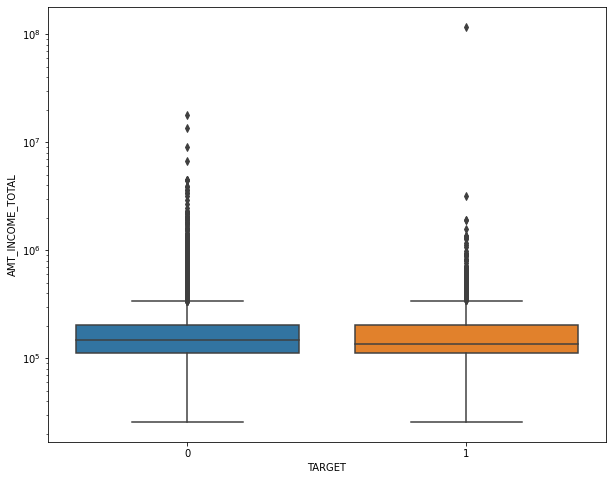

In [430]:
# Checking with plot

plt.figure(figsize = (10,8))
sns.boxplot(x=app_df["TARGET"], y=app_df["AMT_INCOME_TOTAL"])
plt.yscale("log")
plt.show()

In [431]:
app_df["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [432]:
# Observation: No specific patter visible. 
# One outlier in the AMT_INCOME_TOTAL variable. That value may need verification. 
# Person with that high income is not paying loans on time

#### 2] AMT_CREDIT and TARGET

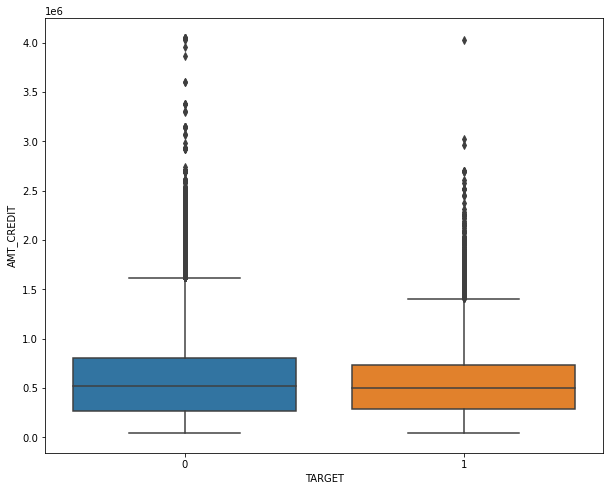

In [433]:
# Checking by plotting the boxplot

plt.figure(figsize = (10,8))
sns.boxplot(x=app_df["TARGET"], y=app_df["AMT_CREDIT"])
#plt.yscale("log")
plt.show()

In [434]:
# No specific pettern to be highlighted

#### 3] AMT_ANNUITY and TARGET

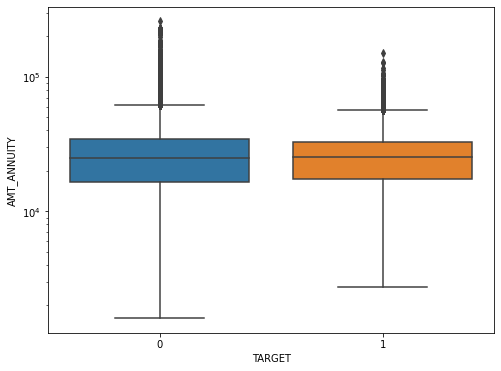

In [435]:
# Checking by plotting the boxplot

plt.figure(figsize = (8,6))
sns.boxplot(x=app_df["TARGET"], y=app_df["AMT_ANNUITY"])
plt.yscale("log")
plt.show()

In [436]:
# Observation: 
# From the range of the box plots, it is observed that clients taking lower and higher annuities are actually 
# regular payers. Clients defaulting are in the middle range (around the median)

#### 4] AMT_GOODS_PRICE and TARGET

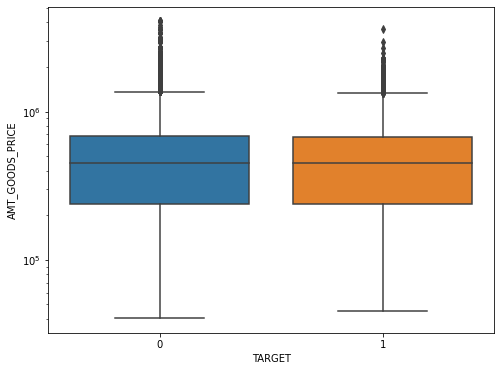

In [437]:
# Checking by plotting the boxplot

plt.figure(figsize = (8,6))
sns.boxplot(x=app_df["TARGET"], y=app_df["AMT_GOODS_PRICE"])
plt.yscale("log")
plt.show()

In [438]:
# No specific pattern observed

### Checking correlation between the various variables in the sub data set created for Target = 0 

In [439]:
# Creating the correlation matrix

corr0=app_df0.corr()

# Replacing the values across diagonals and below to NaN 

corr0 = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool))

In [440]:
# Unstack the matrix and reset the index 

corr_df0= corr0.unstack().reset_index()

In [441]:
# Give names to the columns, drop NaN values, convert the correlation index to poistive values and choose top 10 
# correlation values

corr_df0.columns = ["VAR1", "VAR2", 'Correlation']
corr_df0.dropna(subset = ["Correlation"], inplace = True)

corr_df0['Correlation']=round(corr_df0["Correlation"],2)

# we see the correlation as absolute value
corr_df0['Correlation']=corr_df0["Correlation"].abs()

corr_df0.sort_values(by =  'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.99
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86


### Checking correlation between the various variables in the sub data set created for Target = 1

In [442]:
# Creating the correlation matrix

corr1=app_df1.corr()

# Replacing the values across diagonals and below to NaN 

corr1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))

In [443]:
# Unstack the matrix and reset the index 

corr_df1= corr1.unstack().reset_index()

In [444]:
# Give names to the columns, drop NaN values, convert the correlation index to poistive values and choose top 10 
# correlation values

corr_df1.columns = ["VAR1", "VAR2", 'Correlation']
corr_df1.dropna(subset = ["Correlation"], inplace = True)

corr_df1['Correlation']=round(corr_df1["Correlation"],2)

# we see the correlation as absolute value
corr_df1['Correlation']=corr_df1["Correlation"].abs()

corr_df1.sort_values(by =  'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.98
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87


#### Observation : -  In the correlation matrix with highest (top 10) correlation, we see the same combinations of variables, but with slightly different ranking

In [445]:
corr_df1.sort_values(by =  'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
642,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
676,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
610,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
678,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
168,AMT_GOODS_PRICE,AMT_CREDIT,0.98
576,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
644,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
364,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87


## 3 Reading the Previous Application Data

In [446]:
# Read the previous application data

prev_app_df = pd.read_csv("previous_application.csv")

## 3.1 Inspecting the data frame

In [447]:
prev_app_df.shape            # Shape of the dataframe with the previous application data

(1670214, 37)

In [448]:
prev_app_df.info()           # Information about the columns / variables of previous application data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [449]:
prev_app_df.describe()        # inspecting the numerical columns / variables

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Checking the NULL values in variables and their percentages

## 3.2 Checking NULL values

In [450]:
prev_app_df.isnull().sum(axis=0)

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [451]:
round(((prev_app_df.isnull().sum(axis=0))*100)/(len(prev_app_df.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

## 3.3 Merging the data from previous applications with the current application data

#### This has been done using the left join using the key SK_ID_CURR from both the datasets

In [452]:
merged_app = pd.merge(left=app_df, right=prev_app_df, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [453]:
# checking the shape of the merged data frame

merged_app.shape

(1430155, 119)

## 4 Analysis of the merged dataset

### 4.1 Univariate Analysis

##### 4.1.1 Categorical variables
##### Approach: to look at the distribution of the category values

#### 1] SK_ID_PREV

In [454]:
# Checking how many current applications do not have any previous application history 

merged_app["SK_ID_PREV"].isnull().sum()

16454

In [455]:
# Percentage of values not having previous application number 

round(merged_app["SK_ID_PREV"].isnull().sum()/ len(merged_app)*100,2)

1.15

#### 2] CODE_REJECT_REASON

In [456]:
merged_app["CODE_REJECT_REASON"].value_counts()

XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: CODE_REJECT_REASON, dtype: int64

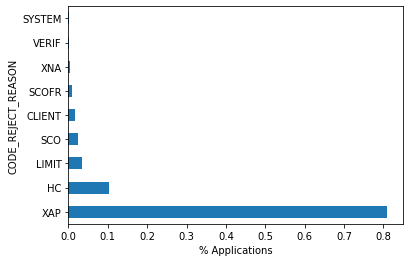

In [457]:
merged_app["CODE_REJECT_REASON"].value_counts(normalize=True).plot.barh()
plt.ylabel("CODE_REJECT_REASON")
plt.xlabel("% Applications")
plt.show()

#### 3] NAME_CONTRACT_STATUS

In [458]:
merged_app["NAME_CONTRACT_STATUS"].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [459]:
# Checking % of values also

round(merged_app["NAME_CONTRACT_STATUS"].value_counts()/ len(merged_app)*100,2)

Approved        61.96
Canceled        18.14
Refused         17.16
Unused offer     1.59
Name: NAME_CONTRACT_STATUS, dtype: float64

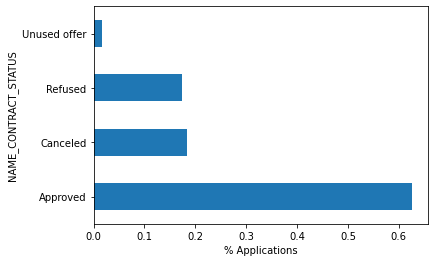

In [460]:
merged_app["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.barh()
plt.ylabel("NAME_CONTRACT_STATUS")
plt.xlabel("% Applications")
plt.show()

In [461]:
# Observation: About 62% of the applications were approved and about 17% were refused 

#### 4] NAME_CONTRACT_TYPE for previous applications

In [462]:
merged_app["NAME_CONTRACT_TYPE_y"].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE_y, dtype: int64

In [463]:
# Checking for % also

round(merged_app["NAME_CONTRACT_TYPE_y"].value_counts()/len(merged_app)*100,2)

Cash loans         43.82
Consumer loans     43.72
Revolving loans    11.28
XNA                 0.02
Name: NAME_CONTRACT_TYPE_y, dtype: float64

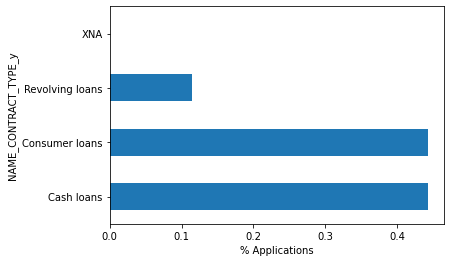

In [464]:
merged_app["NAME_CONTRACT_TYPE_y"].value_counts(normalize=True).plot.barh()
plt.ylabel("NAME_CONTRACT_TYPE_y")
plt.xlabel("% Applications")
plt.show()

#### 5] NAME_CASH_LOAN_PURPOSE 

In [465]:
merged_app["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

In [466]:
round(merged_app["NAME_CASH_LOAN_PURPOSE"].value_counts()/len(merged_app)*100,2)

XAP                                 55.02
XNA                                 39.67
Repairs                              1.41
Other                                0.94
Urgent needs                         0.51
Buying a used car                    0.17
Building a house or an annex         0.16
Everyday expenses                    0.14
Medicine                             0.13
Payments on other loans              0.11
Education                            0.09
Journey                              0.07
Purchase of electronic equipment     0.07
Buying a new car                     0.06
Wedding / gift / holiday             0.06
Buying a home                        0.05
Car repairs                          0.05
Furniture                            0.05
Buying a holiday home / land         0.03
Business development                 0.03
Gasification / water supply          0.02
Buying a garage                      0.01
Hobby                                0.00
Money for a third person          

In [467]:
# Observed: Most of the values (about 94%) do not have any specific Purpose mentioned  

### 4.2 Bivariate / Multivariate Analysis

#### Approach:  
#### Look at the cross table for counts between the variable under study and the target variable and also check their %
#### values in each category of cross table. Plot a countplot wherever needed

##### 4.2.1 Categorical variables

#### 1] Checking for any correlation between TARGET and the NAME_CONTRACT_STATUS

In [468]:
# Checking the possible relationship using the crosstab and the percentages

contract_target = pd.crosstab(index=merged_app["NAME_CONTRACT_STATUS"],columns=merged_app["TARGET"])
contract_target

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,818856,67243
Canceled,235641,23800
Refused,215952,29438
Unused offer,20892,1879


In [469]:
round(contract_target.div(contract_target.sum(axis=1), axis=0)*100,1)

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,92.4,7.6
Canceled,90.8,9.2
Refused,88.0,12.0
Unused offer,91.7,8.3


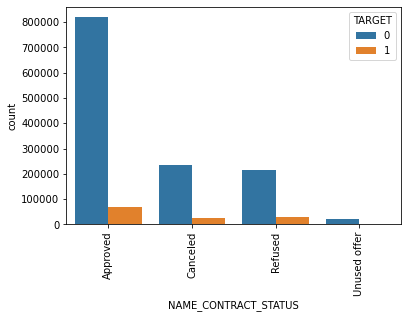

In [470]:
sns.countplot (x = "NAME_CONTRACT_STATUS", hue= "TARGET", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [471]:
# Observation:
# Out of the clients whose applications were refused earlier and got a loan now, 12% are defaulters, 
# and 88% are regular payers

#### 2] NAME_CONTRACT_TYPE from previous application and NAME_CONTRACT_STATUS

In [472]:
# Preparing a crosstab to check the values in each category against the Target 

type_status = pd.crosstab(index=merged_app["NAME_CONTRACT_TYPE_y"],columns=merged_app["NAME_CONTRACT_STATUS"])
type_status

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE_y,,,,
Cash loans,266381,220383,139568,432
Consumer loans,537310,1329,64282,22335
Revolving loans,82408,37445,41511,4
XNA,0,284,29,0


In [473]:
# Checking the % values against the Target variable 
round(type_status.div(type_status.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE_y,,,,
Cash loans,42.5,35.2,22.3,0.1
Consumer loans,85.9,0.2,10.3,3.6
Revolving loans,51.1,23.2,25.7,0.0
XNA,0.0,90.7,9.3,0.0


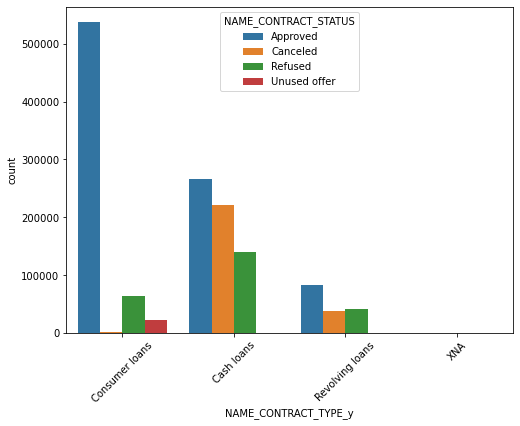

In [474]:
plt.figure(figsize = (8,6))
sns.countplot (x = "NAME_CONTRACT_TYPE_y", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 45)
plt.show()

In [475]:
#Observation:
# Consumer loans have a very high approval rate (about 85.9%)
# Revolving loans have a very high refusal rate (about 25.7%)

#### 3] NAME_GOODS_CATEGORY and NAME_CONTRACT_STATUS

In [476]:
# Preparing a crosstab to check the values in each category against the Target 

goods_contract = pd.crosstab(index=merged_app["NAME_GOODS_CATEGORY"],columns=merged_app["NAME_CONTRACT_STATUS"])
goods_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_GOODS_CATEGORY,,,,
Additional Service,97,0,12,0
Animals,1,0,0,0
Audio/Video,76930,24,7719,829
Auto Accessories,5539,2,569,118
Clothing and Accessories,17864,0,1654,72
Computers,74852,26,11493,3552
Construction Materials,19184,5,2116,51
Consumer Electronics,96270,21,7681,813
Direct Sales,277,0,52,1


In [477]:
# Checking the % values against the Target variable 

round(goods_contract.div(goods_contract.sum(axis=1), axis=0)*100,1).sort_values(by = "Refused", ascending = False)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_GOODS_CATEGORY,,,,
XNA,43.8,32.5,23.7,0.1
Direct Sales,83.9,0.0,15.8,0.3
Education,84.3,0.0,15.7,0.0
Insurance,82.8,0.0,15.5,1.7
Computers,83.2,0.0,12.8,4.0
Additional Service,89.0,0.0,11.0,0.0
Tourism,88.9,0.1,10.6,0.4
Vehicles,89.2,0.0,10.4,0.4
Office Appliances,89.5,0.0,10.1,0.5


In [478]:
# Observation:
# If the Goods Category is not clear (XNA) then the refusal rates are high at 23.7%

#### 4] NAME_PORTFOLIO and NAME_CONTRACT_STATUS

In [479]:
# Preparing a crosstab to check the values in each category against the Target
portfolio_contract = pd.crosstab(index=merged_app["NAME_PORTFOLIO"],columns=merged_app["NAME_CONTRACT_STATUS"])
portfolio_contract

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_PORTFOLIO,,,,
Cards,82408,417,39159,1
Cars,241,33,106,0
Cash,266378,8183,117102,0
POS,537069,127,54482,782
XNA,3,250681,34541,21988


In [480]:
# Checking the % values against the Target variable 

round(portfolio_contract.div(portfolio_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_PORTFOLIO,,,,
Cards,67.6,0.3,32.1,0.0
Cars,63.4,8.7,27.9,0.0
Cash,68.0,2.1,29.9,0.0
POS,90.7,0.0,9.2,0.1
XNA,0.0,81.6,11.2,7.2


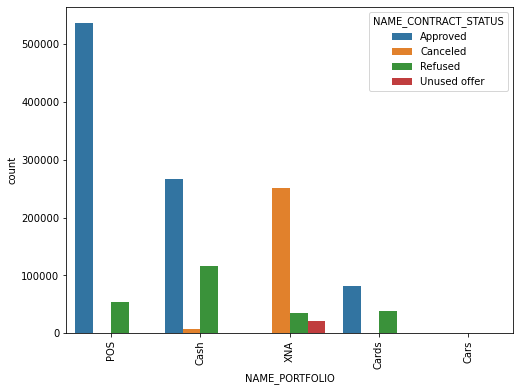

In [481]:
plt.figure(figsize = (8,6))
sns.countplot (x = "NAME_PORTFOLIO", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [482]:
# Observation:
# POS loans have 9.2 % refusals, other loans - Cards, Car, Cash have higher refusals 27.8% to 32.2%. 
# XNA cases (assuming the purpose was not clear) were typically not approved. 82.2% were cancelled by clients `themselves.

#### 5] NAME_INCOME_TYPE and NAME_CONTRACT_STATUS

In [483]:
# Preparing a crosstab to check the values in each category against the Target
income_contract = pd.crosstab(index=merged_app["NAME_INCOME_TYPE"],columns=merged_app["NAME_CONTRACT_STATUS"])
income_contract

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_INCOME_TYPE,,,,
Commercial associate,198507,59785,58117,5072
Maternity leave,10,2,3,1
Pensioner,170144,57674,43802,1924
State servant,61630,15679,15597,1518
Student,20,3,1,0
Unemployed,68,16,38,1
Working,455720,126282,127832,14255


In [484]:
# Checking the % values against the Target variable 

round(income_contract.div(income_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_INCOME_TYPE,,,,
Commercial associate,61.7,18.6,18.1,1.6
Maternity leave,62.5,12.5,18.8,6.2
Pensioner,62.2,21.1,16.0,0.7
State servant,65.3,16.6,16.5,1.6
Student,83.3,12.5,4.2,0.0
Unemployed,55.3,13.0,30.9,0.8
Working,62.9,17.4,17.7,2.0


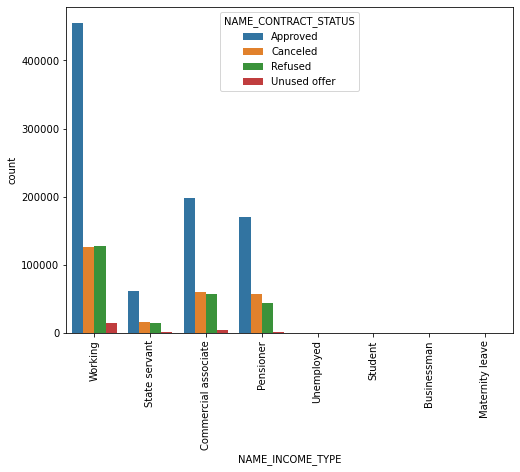

In [485]:
plt.figure(figsize = (8,6))
sns.countplot (x = "NAME_INCOME_TYPE", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [486]:
# Observation:
# The approval rates for "Students" have been high at 83.3%  and low for "Unemployed" low at 55.3%
# This would make sense as there could be higher probability of unemployed not being able to pay the loan back 

#### 6] NAME_EDUCATION_TYPE and NAME_CONTRACT_STATUS

In [487]:
# Preparing a crosstab to check the values in each category against the Target

edu_contract = pd.crosstab(index=merged_app["NAME_EDUCATION_TYPE"],columns=merged_app["NAME_CONTRACT_STATUS"])
edu_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_EDUCATION_TYPE,,,,
Academic degree,418,64,91,6
Higher education,195002,57074,54051,6718
Incomplete higher,27676,7917,8635,983
Lower secondary,10929,3099,2971,165
Secondary / secondary special,652074,191287,179642,14899


In [488]:
# Checking the % values against the Target variable
round(edu_contract.div(edu_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_EDUCATION_TYPE,,,,
Academic degree,72.2,11.1,15.7,1.0
Higher education,62.3,18.2,17.3,2.1
Incomplete higher,61.2,17.5,19.1,2.2
Lower secondary,63.7,18.1,17.3,1.0
Secondary / secondary special,62.8,18.4,17.3,1.4


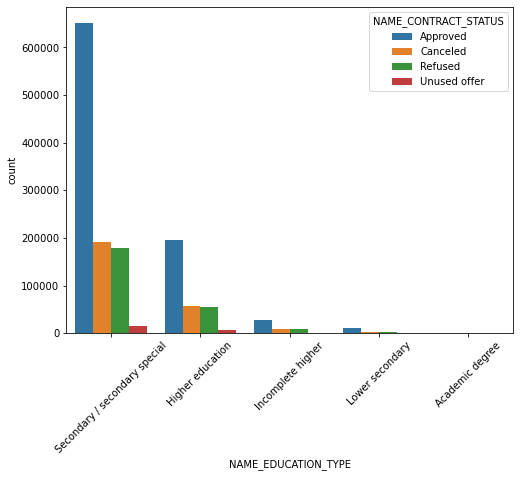

In [489]:
plt.figure(figsize = (8,6))
sns.countplot (x = "NAME_EDUCATION_TYPE", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 45)
plt.show()

In [490]:
# Observation:
# There have been higher (about 19.1%) "Refusals" for applicants having "Incomplete higher" education 

#### 7] NAME_FAMILY_STATUS and NAME_CONTRACT_STATUS

In [491]:
# Preparing a crosstab to check the values in each category against the Target

family_contract = pd.crosstab(index=merged_app["NAME_FAMILY_STATUS"],columns=merged_app["NAME_CONTRACT_STATUS"])
family_contract

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_FAMILY_STATUS,,,,
Civil marriage,86827,26143,28226,1961
Married,577137,167233,152167,14373
Separated,56750,16535,16453,1600
Single / not married,114880,33403,34292,4082
Widow,50505,16127,14252,755


In [492]:
# Checking the % values against the Target variable
round(family_contract.div(family_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_FAMILY_STATUS,,,,
Civil marriage,60.7,18.3,19.7,1.4
Married,63.4,18.4,16.7,1.6
Separated,62.1,18.1,18.0,1.8
Single / not married,61.5,17.9,18.4,2.2
Widow,61.9,19.8,17.5,0.9


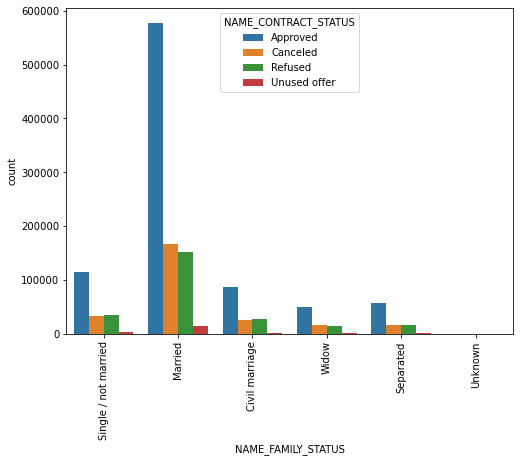

In [493]:
plt.figure(figsize = (8,6))
sns.countplot (x = "NAME_FAMILY_STATUS", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [494]:
# Observation:
# "Civil Marriage" cases have higher "Refusal" rates at 19.7%

#### 8] NAME_HOUSING_TYPE and NAME_CONTRACT_STATUS

In [495]:
# Preparing a crosstab to check the values in each category against the Target
housing_contract = pd.crosstab(index=merged_app["NAME_HOUSING_TYPE"],columns=merged_app["NAME_CONTRACT_STATUS"])
housing_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_HOUSING_TYPE,,,,
Co-op apartment,2788,629,659,313
House / apartment,791667,234120,219301,19864
Municipal apartment,33138,9149,8544,702
Office apartment,7319,1926,2005,178
Rented apartment,12608,3385,3514,278
With parents,38579,10232,11367,1436


In [496]:
# Checking the % values against the Target variable
round(housing_contract.div(housing_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_HOUSING_TYPE,,,,
Co-op apartment,63.5,14.3,15.0,7.1
House / apartment,62.6,18.5,17.3,1.6
Municipal apartment,64.3,17.8,16.6,1.4
Office apartment,64.0,16.9,17.5,1.6
Rented apartment,63.7,17.1,17.8,1.4
With parents,62.6,16.6,18.4,2.3


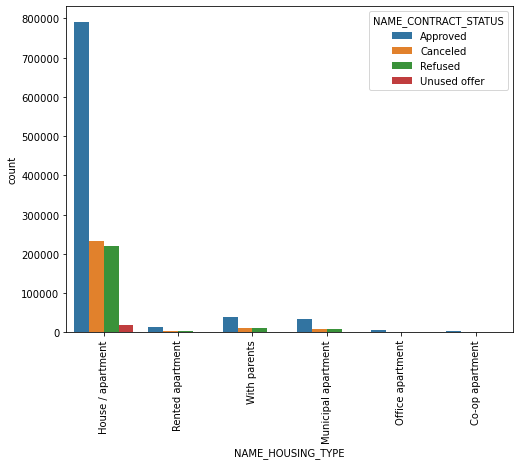

In [497]:
plt.figure(figsize = (8,6))
sns.countplot (x = "NAME_HOUSING_TYPE", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [498]:
# Observation:
# Applications with  "Municipal apartment" and "Office apartment" had higher approval rates at 64.3% and 64% respectively

#### 9] CODE_GENDER and NAME_CONTRACT_STATUS

In [499]:
# Preparing a crosstab to check the values in each category against the Target
gender_contract = pd.crosstab(index=merged_app["CODE_GENDER"],columns=merged_app["NAME_CONTRACT_STATUS"])
gender_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
CODE_GENDER,,,,
F,598626,179037,163302,14174
M,287450,80397,82063,8597
XNA,23,7,25,0


In [500]:
# Checking the % values against the Target variable
round(gender_contract.div(gender_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
CODE_GENDER,,,,
F,62.7,18.7,17.1,1.5
M,62.7,17.5,17.9,1.9
XNA,41.8,12.7,45.5,0.0


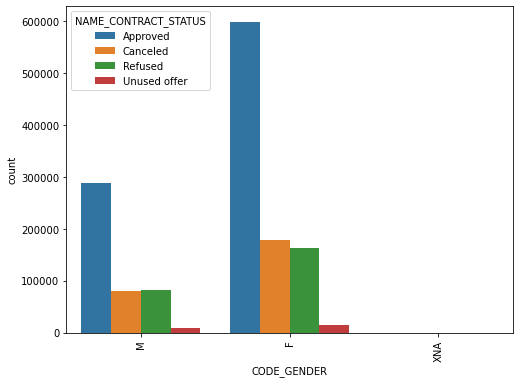

In [501]:
plt.figure(figsize = (8,6))
sns.countplot (x = "CODE_GENDER", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [502]:
#Observation:
# Approval rates and rejection rates do not show a significant difference 

#### 10] FLAG_OWN_CAR and NAME_CONTRACT_STATUS

In [503]:
# Preparing a crosstab to check the values in each category against the Target
car_contract = pd.crosstab(index=merged_app["FLAG_OWN_CAR"],columns=merged_app["NAME_CONTRACT_STATUS"])
car_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
FLAG_OWN_CAR,,,,
N,584905,179542,160302,12427
Y,301194,79899,85088,10344


In [504]:
# Checking the % values against the Target variable
round(car_contract.div(car_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
FLAG_OWN_CAR,,,,
N,62.4,19.2,17.1,1.3
Y,63.2,16.8,17.9,2.2


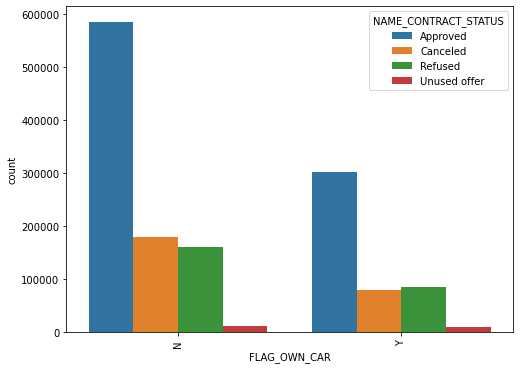

In [505]:
plt.figure(figsize = (8,6))
sns.countplot (x = "FLAG_OWN_CAR", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [506]:
#Observation:
# Approval rates and rejection rates do not show a significant difference 

#### 11] FLAG_OWN_REALTY and NAME_CONTRACT_STATUS

In [507]:
# Preparing a crosstab to check the values in each category against the Target
realty_contract = pd.crosstab(index=merged_app["FLAG_OWN_REALTY"],columns=merged_app["NAME_CONTRACT_STATUS"])
realty_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
FLAG_OWN_REALTY,,,,
N,250728,64699,67594,6588
Y,635371,194742,177796,16183


In [508]:
# Checking the % values against the Target variable
round(realty_contract.div(realty_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
FLAG_OWN_REALTY,,,,
N,64.4,16.6,17.3,1.7
Y,62.0,19.0,17.4,1.6


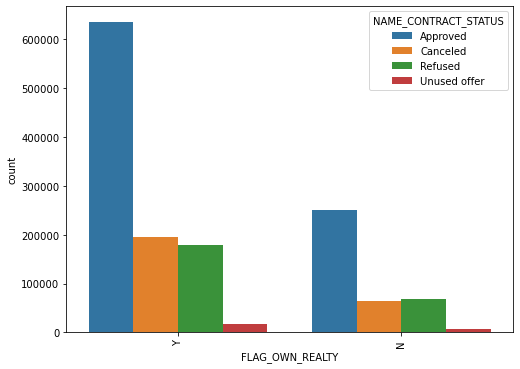

In [509]:
plt.figure(figsize = (8,6))
sns.countplot (x = "FLAG_OWN_REALTY", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [510]:
# Observation:
# Approval rates for applications with No Own Realty is higher at 64.4% 

#### 12] OCCUPATION_TYPE and NAME_CONTRACT_STATUS

In [511]:
# Preparing a crosstab to check the values in each category against the Target
occup_contract = pd.crosstab(index=merged_app["OCCUPATION_TYPE"],columns=merged_app["NAME_CONTRACT_STATUS"])
occup_contract

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
OCCUPATION_TYPE,,,,
Accountants,26957,7463,6787,751
Cleaning staff,14888,4718,4403,319
Cooking staff,17925,5169,5080,552
Core staff,75415,19877,20579,2401
Drivers,52300,14861,15363,1543
HR staff,1404,455,412,42
High skill tech staff,31306,8483,7743,951
IT staff,1148,266,258,31
Laborers,159468,43432,43504,4895


In [512]:
# Checking the % values against the Target variable
round(occup_contract.div(occup_contract.sum(axis=1), axis=0)*100,1).sort_values(by = "Refused", ascending = False)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
OCCUPATION_TYPE,,,,
Managers,61.5,17.7,19.1,1.7
Low-skill Laborers,61.0,18.6,18.5,1.8
Sales staff,61.5,18.3,18.5,1.7
Drivers,62.2,17.7,18.3,1.8
Cleaning staff,61.2,19.4,18.1,1.3
HR staff,60.7,19.7,17.8,1.8
Cooking staff,62.4,18.0,17.7,1.9
Security staff,62.5,18.5,17.5,1.5
Core staff,63.8,16.8,17.4,2.0


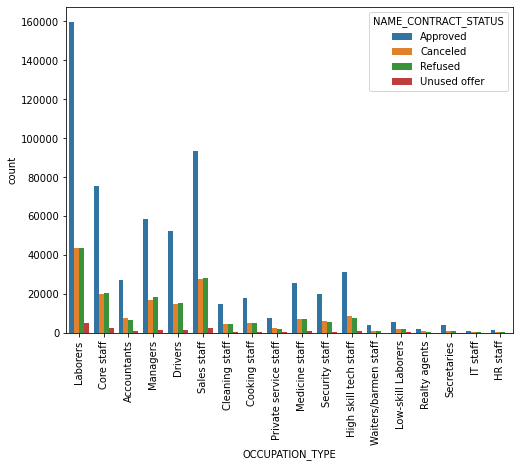

In [513]:
plt.figure(figsize = (8,6))
sns.countplot (x = "OCCUPATION_TYPE", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [514]:
# Observation:
# Approval for "IT staff" has been higher at 67.4% and refusals have been 15.1%
# "Managers" and "Low-skill Laborers" have higher refusals

#### 13] ORGANIZATION_TYPE and NAME_CONTRACT_STATUS

In [515]:
# Preparing a crosstab to check the values in each category against the Target
org_contract = pd.crosstab(index=merged_app["ORGANIZATION_TYPE"],columns=merged_app["NAME_CONTRACT_STATUS"])
org_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
ORGANIZATION_TYPE,,,,
Advertising,1102,394,258,28
Agriculture,6921,1721,2024,120
Bank,6398,1957,2102,227
Business Entity Type 1,16213,4383,4370,512
Business Entity Type 2,30043,7482,7890,984
Business Entity Type 3,190069,54609,54448,5763
Cleaning,759,280,231,23
Construction,18668,5240,5256,552
Culture,1044,232,204,38


In [516]:
# Checking the % values against the Target variable
round(org_contract.div(org_contract.sum(axis=1), axis=0)*100,1).sort_values(by = "Refused", ascending = False)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
ORGANIZATION_TYPE,,,,
Trade: type 2,52.6,11.7,32.8,3.0
Trade: type 4,58.2,14.2,26.0,1.5
Industry: type 10,60.8,13.8,23.4,1.9
Trade: type 5,53.3,22.2,22.6,1.9
Mobile,60.1,17.1,20.5,2.3
Insurance,59.6,18.8,20.5,1.1
Industry: type 13,64.9,13.0,19.9,2.2
Industry: type 12,62.3,16.6,19.8,1.3
Bank,59.9,18.3,19.7,2.1


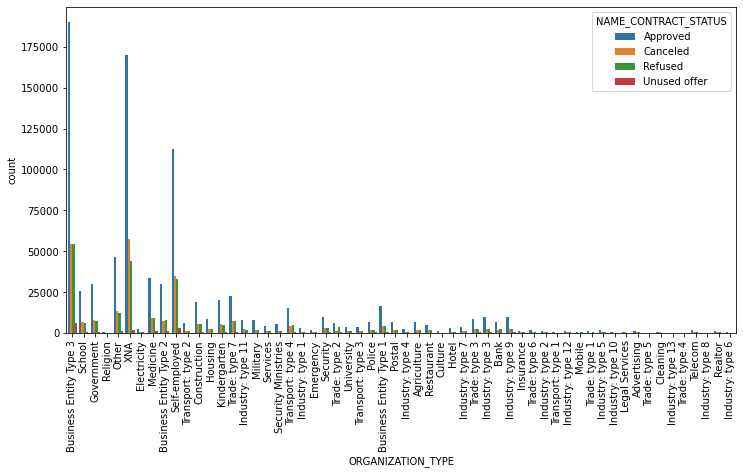

In [517]:
plt.figure(figsize = (12,6))
sns.countplot (x = "ORGANIZATION_TYPE", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [518]:
# Observation:
# There is a correlation between Organization_Type and decision on the applications
# we see high Refusals for "Trade: type 2"  and "Trade: type 4" and low Refusals for "Industry: type 8"

#### 14] NAME_CASH_LOAN_PURPOSE and NAME_CONTRACT_STATUS

In [519]:
# Preparing a crosstab to check the values in each category against the Target
purpose_contract = pd.crosstab(index=merged_app["NAME_CASH_LOAN_PURPOSE"],columns=merged_app["NAME_CONTRACT_STATUS"])
purpose_contract

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CASH_LOAN_PURPOSE,,,,
Building a house or an annex,594,86,1664,0
Business development,109,14,236,0
Buying a garage,31,7,78,0
Buying a holiday home / land,115,15,333,0
Buying a home,166,31,504,0
Buying a new car,195,44,641,6
Buying a used car,745,82,1630,12
Car repairs,302,15,374,0
Education,647,19,663,5


In [520]:
# Checking the % values against the Target variable
round(purpose_contract.div(purpose_contract.sum(axis=1), axis=0)*100,1).sort_values(by = "Refused", ascending = False)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CASH_LOAN_PURPOSE,,,,
Payments on other loans,16.0,4.1,79.8,0.2
Refusal to name the goal,23.1,0.0,76.9,0.0
Buying a new car,22.0,5.0,72.3,0.7
Buying a holiday home / land,24.8,3.2,71.9,0.0
Buying a home,23.7,4.4,71.9,0.0
Building a house or an annex,25.3,3.7,71.0,0.0
Buying a garage,26.7,6.0,67.2,0.0
Buying a used car,30.2,3.3,66.0,0.5
Business development,30.4,3.9,65.7,0.0


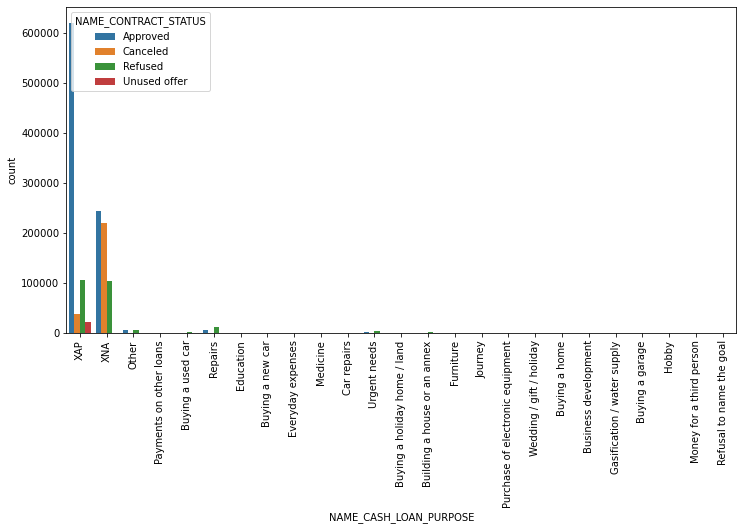

In [521]:
plt.figure(figsize = (12,6))
sns.countplot (x = "NAME_CASH_LOAN_PURPOSE", hue= "NAME_CONTRACT_STATUS", data = merged_app)
plt.xticks(rotation = 90)
plt.show()

In [522]:
# Observation:
# "NAME_CASH_LOAN_PURPOSE" has not been mentioned or was not clear in most of the cases
# There could be a correlation between the purpose and approval rates
# We observe very high Refusals for "Payments on other loans" and "Refusal to name the goal" at 79.8% and 76.9% respectively

##### 4.2.2 Numerical variables

#### Approach:
#### Plot the box plots between the numerical variable and Target

#### 1] RATE_INTEREST_PRIMARY and NAME_CONTRACT_STATUS

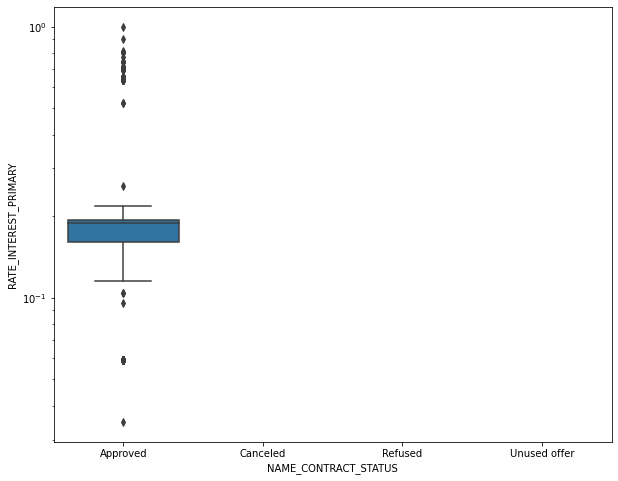

In [523]:
plt.figure(figsize = (10,8))
sns.boxplot(x=merged_app["NAME_CONTRACT_STATUS"], y=merged_app["RATE_INTEREST_PRIMARY"])
plt.yscale("log")
plt.show()

In [524]:
# Since the offered Interest Rates are only mentioned for the Approved applications, 
# we may not be able to infer any relation

#### 2] AMT_CREDIT from Application Dataset and NAME_CONTRACT_STATUS

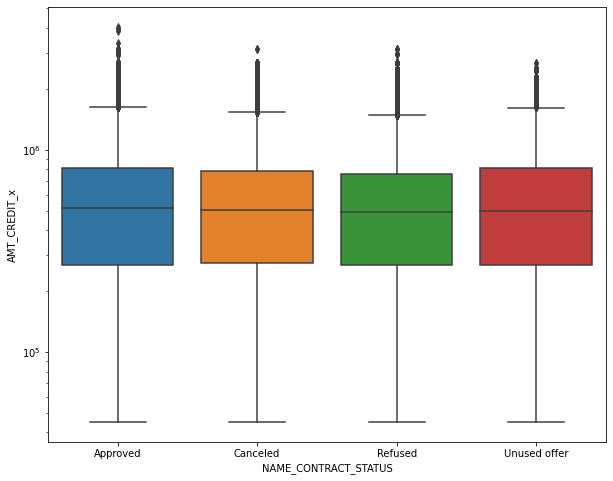

In [525]:
plt.figure(figsize = (10,8))
sns.boxplot(x=merged_app["NAME_CONTRACT_STATUS"], y=merged_app["AMT_CREDIT_x"])
plt.yscale("log")
plt.show()

In [526]:
# Observation:
# As we can see that even if the Previous Application was refused, the CREDIT AMOUNT of LOAN is nearly in same range as
# for other categories. It seems bank has not considered the pevious application decisions for the new applications 

#### 3] AMT_ANNUITY from Application Dataset and NAME_CONTRACT_STATUS

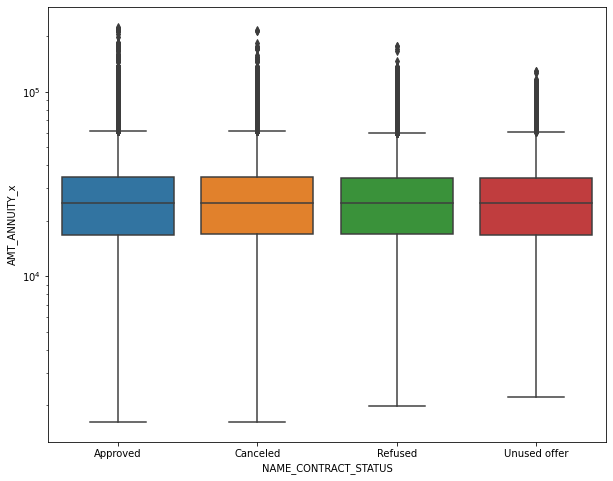

In [527]:
plt.figure(figsize = (10,8))
sns.boxplot(x=merged_app["NAME_CONTRACT_STATUS"], y=merged_app["AMT_ANNUITY_x"])
plt.yscale("log")
plt.show()

In [528]:
# Observation:
# As we can see that even if the Previous Application was Refused, the ANNUITY givenfor teh loan is nearly in same range as
# for other categories. It seems bank has not considred the pevious application decisions for the new applications 

#### 4] DAYS_BIRTH and NAME_CONTRACT_STATUS

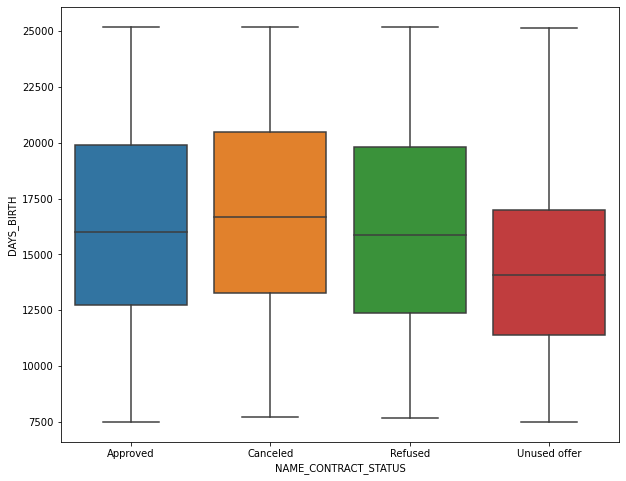

In [529]:
plt.figure(figsize = (10,8))
sns.boxplot(x=merged_app["NAME_CONTRACT_STATUS"], y=merged_app["DAYS_BIRTH"])
plt.show()

In [530]:
# Observation:
# There have been more "Unused Offers" for younger applicants from about 11000 Days (~30 years) 
# to 17000 Days (~44 years) of age 
# They also have slightly higher "Refusals"

In [531]:
# We can check this with respect to the bins that we had created 

In [532]:
age_contract = pd.crosstab(index=merged_app["AGE_BINS"],columns=merged_app["NAME_CONTRACT_STATUS"])
age_contract


NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
AGE_BINS,,,,
Young,21641,5212,6464,967
Middle,540569,146609,150839,17320
Old,323889,107620,88087,4484


In [533]:
round(age_contract.div(age_contract.sum(axis=1), axis=0)*100,1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
AGE_BINS,,,,
Young,63.1,15.2,18.9,2.8
Middle,63.2,17.1,17.6,2.0
Old,61.8,20.5,16.8,0.9


In [534]:
# The Observations are very similar to what we saw for "DAYS_BIRTH", with respect to the "Young Age"  
# Refusal rates for "Young" are also higher at 18.9%

#### 5] AMT_GOODS_PRICE from previous application and NAME_CONTRACT_STATUS

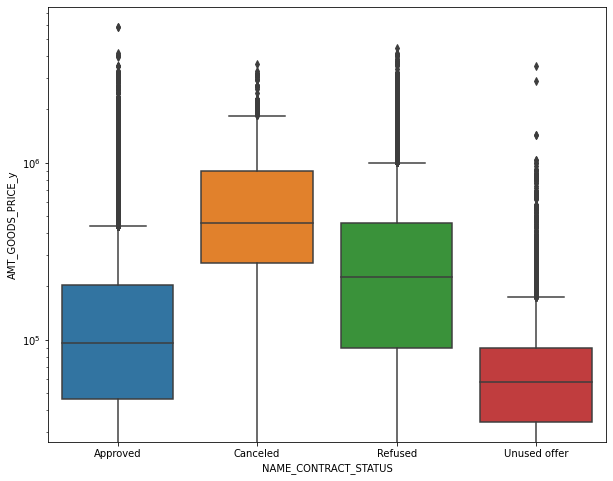

In [535]:
plt.figure(figsize = (10,8))
sns.boxplot(x=merged_app["NAME_CONTRACT_STATUS"], y=merged_app["AMT_GOODS_PRICE_y"])
plt.yscale("log")
plt.show()

In [536]:
# Observation:
# The Goods price have a correlation with the decision on the application
# Cancellations have happened for higher goods price
# The Refusals are for higher goods price than the prices that have been approved